**Importing Necessary Libraries**

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

In [5]:
fb_data = pd.read_csv('pseudo_facebook.csv')

In [6]:
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [7]:
fb_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [11]:
#checking NA values for different columns
fb_data.isna().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

The gender column has 175 missing values and the tenure column has 2 missing values.

We will remove the 177 null data as these 177 datapoints are not going to affect the analysis much as we already have 100,000 data. Therefore, dropping the NA values for now.

**Data Cleaning**

In [12]:
fb_data_updated = fb_data.dropna()

**Data Exploration**

<Figure size 648x576 with 0 Axes>

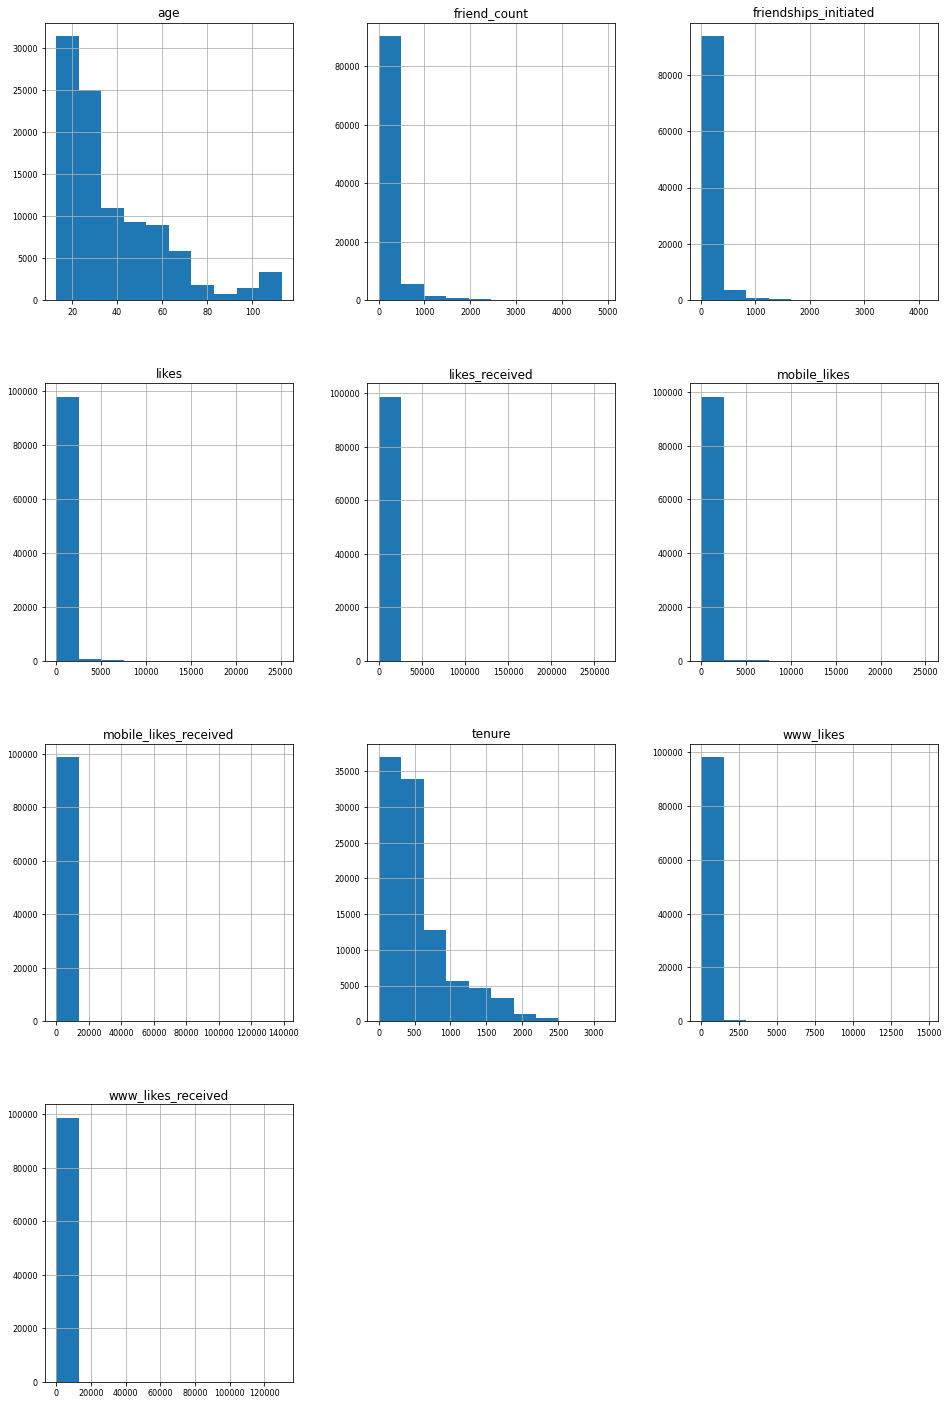

In [15]:
plt.figure(figsize=(9, 8))
fb_data_updated[['age','gender','tenure','friend_count','friendships_initiated','likes','likes_received',
                  'mobile_likes','mobile_likes_received','www_likes',
                  'www_likes_received']].hist(figsize=(16, 25), bins=10, xlabelsize=8, ylabelsize=8);


**Intuitions:**

- From the age data plot,we can say that most of the people belong to the age-groups (0-30) and then starts decreasing with increase in age from 40.


- From the likes related plots, we can see that likes' values (given or received) are in general right skewed which is obvious. There are few people who are very active in liking or receiving likes, most of the people are in the lower range.


- From tenure data plot, we see that Tenure is also right skewed. Since, this data is from 2013, most of the people in the data have joined facebook in the last 600 days and there are very few people using it for long time.


- Friend_count and friendship_initiated data is also right skewed, there are very few people who have 1000+ friends or have initiated 1000+ friendships.

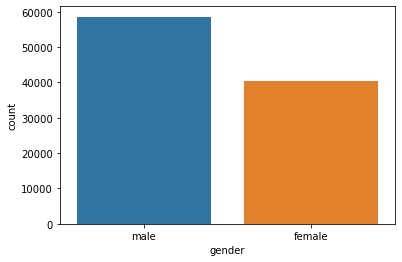

In [16]:
#gender distribution in the data
ax = sns.countplot(x="gender", data=fb_data_updated)

In [30]:
print('Percentage of males in the dataset',fb_data_updated[fb_data_updated['gender']=='male'].shape[0] * 100 /fb_data_updated.shape[0],"%")

Percentage of males in the dataset 59.26982777811507 %


So, dataset has 59.26% of males and 40% of females.

In [ ]:

#mycolors=np.array(['#F8B195','#F67280','#C06C84','#6C5B7B', '#355C7D'])
mycolors=np.array(['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc'])
k=fb[['userid','likes']].reset_index()
k['likes'].sort_values(ascending=False)[:5].plot(kind='bar', color=mycolors, width=0.8)

**Analysis on Facebook likes**

In [25]:
likes_0=fb_data_updated[(fb_data_updated['likes_received']==0) & (fb_data_updated['likes']==0)].shape[0]
likes_10=fb_data_updated[(fb_data_updated['likes_received']<10) & (fb_data_updated['likes']<10)].shape[0]
print("Percentage of the data who have neither liked nor received any likes is ", likes_0/1000 , "%")
print("Percentage of the data have given or received less than 10 likes is ", likes_10/1000 , "%")

Percentage of the data who have neither liked nor received any likes is  15.44 %
Percentage of the data who have neither liked nor received any likes is  40.353 %


In [35]:
total_males_like = fb_data_updated[fb_data_updated['gender']=='male']['likes'].sum()/fb_data_updated['likes'].sum()
total_males_like_received = fb_data_updated[fb_data_updated['gender']=='male']['likes_received'].sum()/fb_data_updated['likes_received'].sum()
total_friends_males = fb_data_updated[fb_data_updated['gender']=='male']['friend_count'].sum()/fb_data_updated['friend_count'].sum()
total_females_like = fb_data_updated[fb_data_updated['gender']=='female']['likes'].sum()/fb_data_updated['likes'].sum()
total_females_like_received = fb_data_updated[fb_data_updated['gender']=='female']['likes_received'].sum()/fb_data_updated['likes_received'].sum()
total_friends_females = fb_data_updated[fb_data_updated['gender']=='female']['friend_count'].sum()/fb_data_updated['friend_count'].sum()
print('Percentage of likes done by all the males  in the dataset', total_males_like*100,"%")
print('Percentage of likes received by all the males in the dataset', total_males_like_received*100,"%")
print('Percentage of friend_Counts of all the males in the dataset', total_friends_males*100,"%")
print('Percentage of likes done by all the females  in the dataset', total_females_like*100,"%")
print('Percentage of likes received by all the females in the dataset', total_females_like_received*100,"%")
print('Percentage of friend_Counts of all the females in the dataset', total_friends_females*100,"%")

Percentage of likes done by all the males  in the dataset 32.149046069196324 %
Percentage of likes received by all the males in the dataset 28.21360213245513 %
Percentage of friend_Counts of all the males in the dataset 49.81118532312801 %
Percentage of likes done by all the females  in the dataset 67.85095393080368 %
Percentage of likes received by all the females in the dataset 71.78639786754488 %
Percentage of friend_Counts of all the females in the dataset 50.188814676872 %


**Observations:**
We can say that males constitute 60% of the data and have almost similar number of friends as the females, Males have given almost half the likes given by the females i.e 32% of data. When it comes to likes_received they have received about 1/3rd of the likes on facebook.

Females are more likely to like and receive likes on facebook.

**Male & Female likes ratio**

In [37]:
avg_males_like_to_female_like_ratio = fb_data_updated[fb_data_updated['gender']=='male']['likes'].mean()/fb_data_updated[fb_data_updated['gender']=='female']['likes'].mean()
avg_males_like_received_to_female_like_ratio = fb_data_updated[fb_data_updated['gender']=='male']['likes_received'].mean()/fb_data_updated[fb_data_updated['gender']=='female']['likes_received'].mean()
print('Ratio of likes done by male to female', avg_males_like_to_female_like_ratio*10)
print('Ratio of likes received by male to female', avg_males_like_received_to_female_like_ratio*10)

Ratio of likes done by 1 male to 1 female 3.256077357639807
Ratio of likes received by 1 male to 1 female 2.700840622868919


**Observations:**
- For every 1 like that a male does, a female does 3 likes.
- For every 1 like that a male receives, a female does 3 likes.

Text(0.5, 1.0, 'Likes done on facebook by males and females')

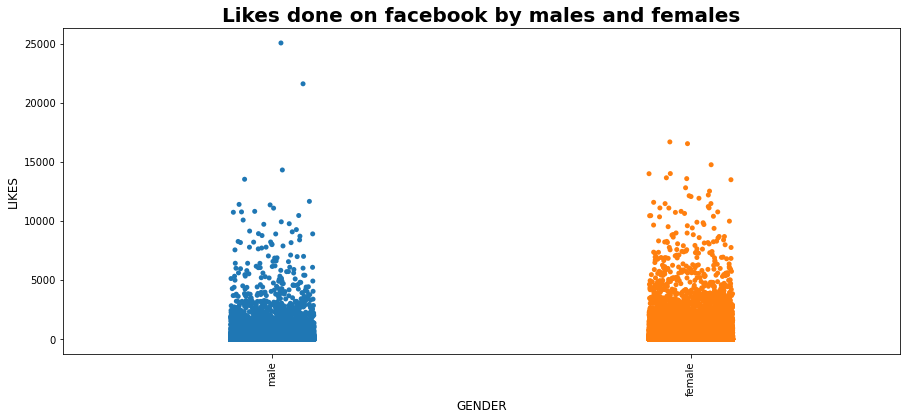

In [54]:
#Jitter plot to analyse likes by males and females
plt.figure(figsize=(15, 6))
ax = sns.stripplot(x="gender", y="likes", jitter = True, data=fb_data_updated)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('GENDER', fontsize = 12)
ax.set_ylabel('LIKES', fontsize = 12)
plt.title('Likes done on facebook by males and females',fontsize=20,color='black',weight='bold')

Text(0.5, 1.0, 'Likes recieved on facebook by males and females')

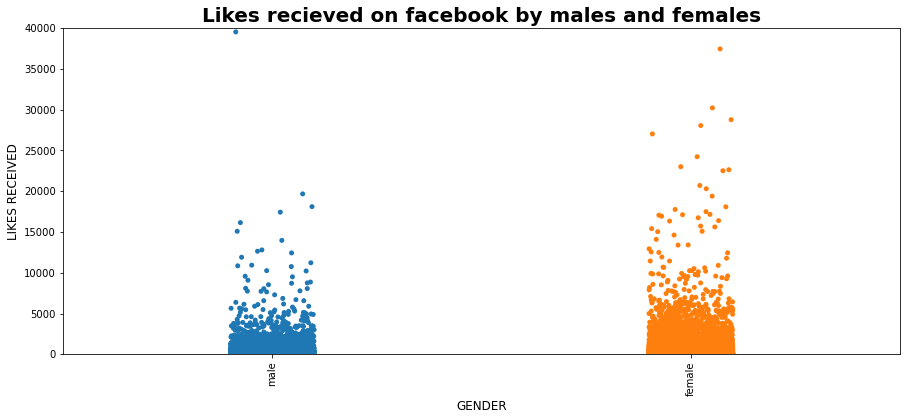

In [60]:
#Jitter plot to analyse likes by males and females
plt.figure(figsize=(15, 6))
ax = sns.stripplot(x="gender", y="likes_received", jitter = True, data=fb_data_updated)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel('GENDER', fontsize = 12)
ax.set_ylabel('LIKES RECEIVED', fontsize = 12)
plt.ylim(0,40000)
plt.title('Likes recieved on facebook by males and females',fontsize=20,color='black',weight='bold')

**Observations**

From the jitter plot, we can say that the Females like more than males and also female receieve more likes than males.

**Likes by Birth Year & month**

Text(114.0, 0.5, 'Months')

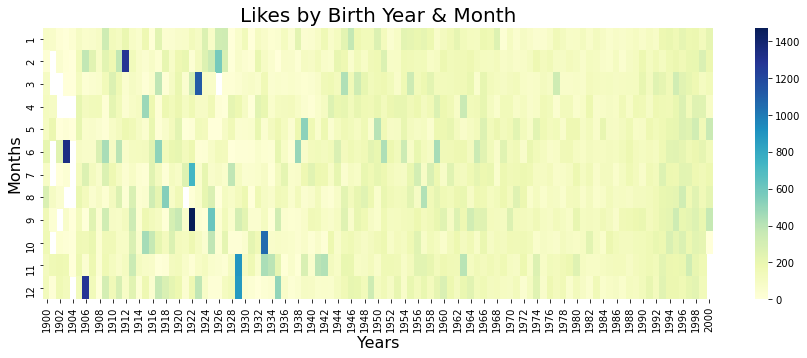

In [62]:
fb_likes = pd.pivot_table(fb_data_updated,index='dob_month', columns='dob_year',values= 'likes', aggfunc='mean')
fig, ax = plt.subplots(figsize=(15,5)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Likes by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

Text(114.0, 0.5, 'Months')

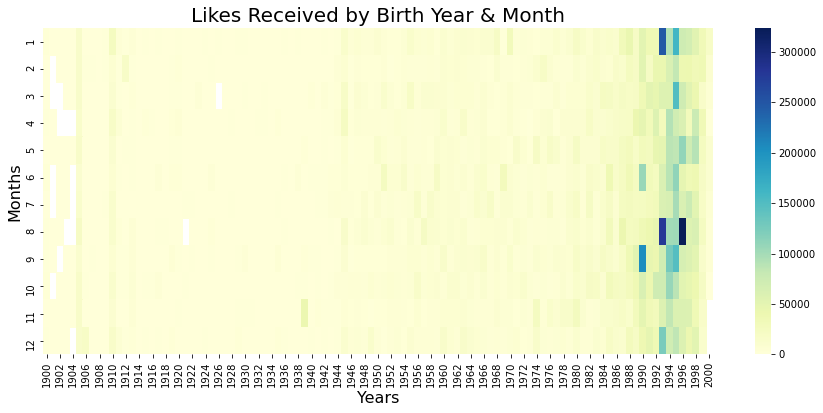

In [64]:
fb_likes = pd.pivot_table(fb_data_updated,index='dob_month', columns='dob_year',values= 'likes_received', aggfunc='sum')
fig, ax = plt.subplots(figsize=(15,6)) 
x = sns.heatmap(fb_likes, cmap="YlGnBu", ax=ax)
ax.set_title('Likes Received by Birth Year & Month', size=20)
ax.set_xlabel('Years', size=16)
ax.set_ylabel('Months', size=16)

**Observations:**
- As years are increasing on x-axis there are more number of likes, depicting extensive usage of facebook
- People born in January and August are the ones to receive most number of likes.

**Users w.r.t birth years**

Text(0.5, 1.0, 'Total no. of Users w.r.t birth year')

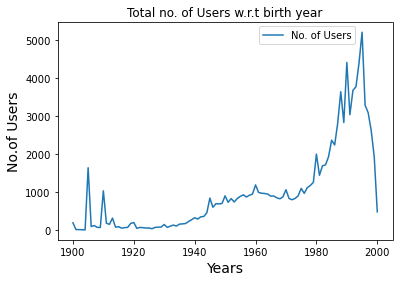

In [93]:
fb_yearwise=fb_data_updated[['dob_year','userid']].drop_duplicates().sort_values(by='dob_year')
fb_yearwise=fb_yearwise.groupby(['dob_year'])[['userid']].agg('count')
fb_yearwise.columns=['No. of Users']
fb_yearwise.plot(kind='line')
plt.legend(loc=(0.60,0.9))
plt.xlabel("Years", size = 14)
plt.ylabel("No.of Users", size = 14)
plt.title("Total no. of Users w.r.t birth year")

From the above plot, we can say that the from 1980 the no. users has rapidly increased.

**Modelling**

Trying to fit a random forest and Stochastic gradient regressor to predict the number of likes based on the variables age, gender, tenure, friend_count, friendships_initiated and likes_received. It will give us an intuition on how useful these predictors are to predict 'number of facebook likes'

In [95]:
#selecting columns for random forest regressor
cols_model = ['age', 'gender', 'tenure', 'friend_count', 'friendships_initiated' , 'likes_received']
X = pd.DataFrame(fb_data_updated, columns = cols_model )
y = fb_data_updated['likes']
one_hot = pd.get_dummies(X['gender'])
X = X.drop(columns = ['gender']).join(one_hot)

#splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X,y,random_state=100,shuffle = True)

#fitting randomforestregressor using gridsearchcv for hyperparameter tuning
clf = RandomForestRegressor()

# use a full grid over all parameters
param_grid = {'n_estimators' : [50],
              "max_features": [1, 3],
               }

# run grid search
grid = GridSearchCV(clf, param_grid, cv=5,scoring='r2')

grid.fit(X_train, y_train)
print("Grid-Search with r2")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (MSE)): {:.3f}".format(grid.best_score_))

Grid-Search with r2
Best parameters: {'max_features': 3, 'n_estimators': 50}
Best cross-validation score (MSE)): 0.516


In [101]:
sgd = SGDRegressor(max_iter = 5000,random_state = 42)
sgd.fit(X_train,y_train)
y_predict = sgd.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_predict))
print('Root mean squared error is',rmse)
param_grid = [{'alpha':[0.00000001,0.000001,.00001,0.0001,0.001,0.01,0.1,0.2,0.3],'loss': ['squared_loss','huber'],'max_iter': [1000,5000,10000,15000,20000],
               }]
grid_search = GridSearchCV(sgd,param_grid,cv=5,scoring = 'neg_mean_squared_error')
grid_search.fit(X_train,y_train)
grid_search.best_params_

Root mean squared error is 1.7317241191886658e+16


{'alpha': 0.3, 'loss': 'huber', 'max_iter': 1000}

In [104]:
sgd = SGDRegressor(alpha=0.3,loss = 'huber',max_iter = 1000)
sgd.fit(X_train,y_train)
y_predict = sgd.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,y_predict))
print('Root mean squared error is',rmse)

Root mean squared error is 1076.1221600211652
